In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

/var/folders/w8/3b1vngzj7fl865mcy6wv171r0000gn/T/ipykernel_19071/4188623542.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# grab required data
pa_2004 = pd.read_csv('../data/property_assessment_2004.csv', low_memory=False)[['PID', 'LU']]
pa_2005 = pd.read_csv('../data/property_assessment_2005.csv', low_memory=False)[['PID', 'LU']]
pa_2006 = pd.read_csv('../data/property_assessment_2006.csv', low_memory=False)[['PID', 'LU']]
pa_2007 = pd.read_csv('../data/property_assessment_2007.csv', low_memory=False)[['PID', 'LU']]
pa_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'LU']]
pa_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'LU']]
pa_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'LU']]
pa_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'LU']]
pa_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'LU']]
pa_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'LU']]
pa_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'LU']]
pa_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'LU']]
pa_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'LU']]
pa_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'LU']]
pa_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'LU']]
pa_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'LU']]
pa_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'LU']]
pa_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'LU']]
pa_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'LU']]
pa_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'LU']]
pa_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'LU']]


In [3]:
# preprocessing
# fix 2014 PID column name to match all others
pa_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
pa_2014['PID'] = pa_2014['PID'].astype(str).str.replace('_', '').astype(int)
pa_2015['PID'] = pa_2015['PID'].astype(str).str.replace('_', '').astype(int)
pa_2016['PID'] = pa_2016['PID'].astype(str).str.replace('_', '').astype(int)
pa_2017['PID'] = pa_2017['PID'].astype(str).str.replace('_', '').astype(int)

## Find how many residental units have been added per year

In [4]:
residental_codes = ['R1', 'R2', 'R3', 'R4', 'RC', 'A', 'CM']

# grab all multi family homes in 2004
units_04 = pa_2004[(pa_2004['LU'].isin(residental_codes))]

# then, grab all multi family homes in 2005 that are not in 2004
units_05 = pa_2005[(~(pa_2005.PID.isin(units_04.PID))) & ((pa_2005['LU'].isin(residental_codes)))]

# then grab all multi family homes in 2006 that are not in 2004 or in 2005
units_06 = pa_2006[(~(pa_2006.PID.isin(units_05.PID) | pa_2006.PID.isin(units_04.PID))) & ((pa_2006['LU'].isin(residental_codes)))]

# then grab all multi family homes in 2007 that are not in 2004 or in 2005 or in 2006
units_07 = pa_2007[(~(pa_2007.PID.isin(units_06.PID) | pa_2007.PID.isin(units_05.PID) | pa_2007.PID.isin(units_04.PID))) & ((pa_2007['LU'].isin(residental_codes)))]

# continue as before
units_08 = pa_2008[(~(pa_2008.PID.isin(units_07.PID) | pa_2008.PID.isin(units_06.PID) | pa_2008.PID.isin(units_05.PID) | pa_2008.PID.isin(units_04.PID))) & ((pa_2008['LU'].isin(residental_codes)))]

units_09 = pa_2009[(~(pa_2009.PID.isin(units_08.PID) | pa_2009.PID.isin(units_07.PID) | pa_2009.PID.isin(units_06.PID) | pa_2009.PID.isin(units_05.PID) | pa_2009.PID.isin(units_04.PID))) & ((pa_2009['LU'].isin(residental_codes)))]

units_10 = pa_2010[(~(pa_2010.PID.isin(units_09.PID) | pa_2010.PID.isin(units_08.PID) | pa_2010.PID.isin(units_07.PID) | pa_2010.PID.isin(units_06.PID) | pa_2010.PID.isin(units_05.PID) | pa_2010.PID.isin(units_04.PID))) & ((pa_2010['LU'].isin(residental_codes)))]

units_11 = pa_2011[(~(pa_2011.PID.isin(units_10.PID) | pa_2011.PID.isin(units_09.PID) | pa_2011.PID.isin(units_08.PID) | pa_2011.PID.isin(units_07.PID) | pa_2011.PID.isin(units_06.PID) | pa_2011.PID.isin(units_05.PID) | pa_2011.PID.isin(units_04.PID))) & ((pa_2011['LU'].isin(residental_codes)))]

units_12 = pa_2012[(~(pa_2012.PID.isin(units_11.PID) | pa_2012.PID.isin(units_10.PID) | pa_2012.PID.isin(units_09.PID) | pa_2012.PID.isin(units_08.PID) | pa_2012.PID.isin(units_07.PID) | pa_2012.PID.isin(units_06.PID) | pa_2012.PID.isin(units_05.PID) | pa_2012.PID.isin(units_04.PID))) & ((pa_2012['LU'].isin(residental_codes)))]

units_13 = pa_2013[(~(pa_2013.PID.isin(units_12.PID) | pa_2013.PID.isin(units_11.PID) | pa_2013.PID.isin(units_10.PID) | pa_2013.PID.isin(units_09.PID) | pa_2013.PID.isin(units_08.PID) | pa_2013.PID.isin(units_07.PID) | pa_2013.PID.isin(units_06.PID) | pa_2013.PID.isin(units_05.PID) | pa_2013.PID.isin(units_04.PID))) & ((pa_2013['LU'].isin(residental_codes)))]

units_14 = pa_2014[(~(pa_2014.PID.isin(units_13.PID) | pa_2014.PID.isin(units_12.PID) | pa_2014.PID.isin(units_11.PID) | pa_2014.PID.isin(units_10.PID) | pa_2014.PID.isin(units_09.PID) | pa_2014.PID.isin(units_08.PID) | pa_2014.PID.isin(units_07.PID) | pa_2014.PID.isin(units_06.PID) | pa_2014.PID.isin(units_05.PID) | pa_2014.PID.isin(units_04.PID))) & ((pa_2014['LU'].isin(residental_codes)))]

units_15 = pa_2015[(~(pa_2015.PID.isin(units_14.PID) | pa_2015.PID.isin(units_13.PID) | pa_2015.PID.isin(units_12.PID) | pa_2015.PID.isin(units_11.PID) | pa_2015.PID.isin(units_10.PID) | pa_2015.PID.isin(units_09.PID) | pa_2015.PID.isin(units_08.PID) | pa_2015.PID.isin(units_07.PID) | pa_2015.PID.isin(units_06.PID) | pa_2015.PID.isin(units_05.PID) | pa_2015.PID.isin(units_04.PID))) & ((pa_2015['LU'].isin(residental_codes)))]

units_16 = pa_2016[(~(pa_2016.PID.isin(units_15.PID) | pa_2016.PID.isin(units_14.PID) | pa_2016.PID.isin(units_13.PID) | pa_2016.PID.isin(units_12.PID) | pa_2016.PID.isin(units_11.PID) | pa_2016.PID.isin(units_10.PID) | pa_2016.PID.isin(units_09.PID) | pa_2016.PID.isin(units_08.PID) | pa_2016.PID.isin(units_07.PID) | pa_2016.PID.isin(units_06.PID) | pa_2016.PID.isin(units_05.PID) | pa_2016.PID.isin(units_04.PID))) & ((pa_2016['LU'].isin(residental_codes)))]

units_17 = pa_2017[(~(pa_2017.PID.isin(units_16.PID) | pa_2017.PID.isin(units_15.PID) | pa_2017.PID.isin(units_14.PID) | pa_2017.PID.isin(units_13.PID) | pa_2017.PID.isin(units_12.PID) | pa_2017.PID.isin(units_11.PID) | pa_2017.PID.isin(units_10.PID) | pa_2017.PID.isin(units_09.PID) | pa_2017.PID.isin(units_08.PID) | pa_2017.PID.isin(units_07.PID) | pa_2017.PID.isin(units_06.PID) | pa_2017.PID.isin(units_05.PID) | pa_2017.PID.isin(units_04.PID))) & ((pa_2017['LU'].isin(residental_codes)))]

units_18 = pa_2018[(~(pa_2018.PID.isin(units_17.PID) | pa_2018.PID.isin(units_16.PID) | pa_2018.PID.isin(units_15.PID) | pa_2018.PID.isin(units_14.PID) | pa_2018.PID.isin(units_13.PID) | pa_2018.PID.isin(units_12.PID) | pa_2018.PID.isin(units_11.PID) | pa_2018.PID.isin(units_10.PID) | pa_2018.PID.isin(units_09.PID) | pa_2018.PID.isin(units_08.PID) | pa_2018.PID.isin(units_07.PID) | pa_2018.PID.isin(units_06.PID) | pa_2018.PID.isin(units_05.PID) | pa_2018.PID.isin(units_04.PID))) & ((pa_2018['LU'].isin(residental_codes)))]

units_19 = pa_2019[(~(pa_2019.PID.isin(units_18.PID) | pa_2019.PID.isin(units_17.PID) | pa_2019.PID.isin(units_16.PID) | pa_2019.PID.isin(units_15.PID) | pa_2019.PID.isin(units_14.PID) | pa_2019.PID.isin(units_13.PID) | pa_2019.PID.isin(units_12.PID) | pa_2019.PID.isin(units_11.PID) | pa_2019.PID.isin(units_10.PID) | pa_2019.PID.isin(units_09.PID) | pa_2019.PID.isin(units_08.PID) | pa_2019.PID.isin(units_07.PID) | pa_2019.PID.isin(units_06.PID) | pa_2019.PID.isin(units_05.PID) | pa_2019.PID.isin(units_04.PID))) & ((pa_2019['LU'].isin(residental_codes)))]

units_20 = pa_2020[(~(pa_2020.PID.isin(units_19.PID) | pa_2020.PID.isin(units_18.PID) | pa_2020.PID.isin(units_17.PID) | pa_2020.PID.isin(units_16.PID) | pa_2020.PID.isin(units_15.PID) | pa_2020.PID.isin(units_14.PID) | pa_2020.PID.isin(units_13.PID) | pa_2020.PID.isin(units_12.PID) | pa_2020.PID.isin(units_11.PID) | pa_2020.PID.isin(units_10.PID) | pa_2020.PID.isin(units_09.PID) | pa_2020.PID.isin(units_08.PID) | pa_2020.PID.isin(units_07.PID) | pa_2020.PID.isin(units_06.PID) | pa_2020.PID.isin(units_05.PID) | pa_2020.PID.isin(units_04.PID))) & ((pa_2020['LU'].isin(residental_codes)))]

units_21 = pa_2021[(~(pa_2021.PID.isin(units_20.PID) | pa_2021.PID.isin(units_19.PID) | pa_2021.PID.isin(units_18.PID) | pa_2021.PID.isin(units_17.PID) | pa_2021.PID.isin(units_16.PID) | pa_2021.PID.isin(units_15.PID) | pa_2021.PID.isin(units_14.PID) | pa_2021.PID.isin(units_13.PID) | pa_2021.PID.isin(units_12.PID) | pa_2021.PID.isin(units_11.PID) | pa_2021.PID.isin(units_10.PID) | pa_2021.PID.isin(units_09.PID) | pa_2021.PID.isin(units_08.PID) | pa_2021.PID.isin(units_07.PID) | pa_2021.PID.isin(units_06.PID) | pa_2021.PID.isin(units_05.PID) | pa_2021.PID.isin(units_04.PID))) & ((pa_2021['LU'].isin(residental_codes)))]

units_22 = pa_2022[(~(pa_2022.PID.isin(units_21.PID) | pa_2022.PID.isin(units_20.PID) | pa_2022.PID.isin(units_19.PID) | pa_2022.PID.isin(units_18.PID) | pa_2022.PID.isin(units_17.PID) | pa_2022.PID.isin(units_16.PID) | pa_2022.PID.isin(units_15.PID) | pa_2022.PID.isin(units_14.PID) | pa_2022.PID.isin(units_13.PID) | pa_2022.PID.isin(units_12.PID) | pa_2022.PID.isin(units_11.PID) | pa_2022.PID.isin(units_10.PID) | pa_2022.PID.isin(units_09.PID) | pa_2022.PID.isin(units_08.PID) | pa_2022.PID.isin(units_07.PID) | pa_2022.PID.isin(units_06.PID) | pa_2022.PID.isin(units_05.PID) | pa_2022.PID.isin(units_04.PID))) & ((pa_2022['LU'].isin(residental_codes)))]

units_23 = pa_2023[(~(pa_2023.PID.isin(units_22.PID) | pa_2023.PID.isin(units_21.PID) | pa_2023.PID.isin(units_20.PID) | pa_2023.PID.isin(units_19.PID) | pa_2023.PID.isin(units_18.PID) | pa_2023.PID.isin(units_17.PID) | pa_2023.PID.isin(units_16.PID) | pa_2023.PID.isin(units_15.PID) | pa_2023.PID.isin(units_14.PID) | pa_2023.PID.isin(units_13.PID) | pa_2023.PID.isin(units_12.PID) | pa_2023.PID.isin(units_11.PID) | pa_2023.PID.isin(units_10.PID) | pa_2023.PID.isin(units_09.PID) | pa_2023.PID.isin(units_08.PID) | pa_2023.PID.isin(units_07.PID) | pa_2023.PID.isin(units_06.PID) | pa_2023.PID.isin(units_05.PID) | pa_2023.PID.isin(units_04.PID))) & ((pa_2023['LU'].isin(residental_codes)))]

units_24 = pa_2024[(~(pa_2024.PID.isin(units_23.PID) | pa_2024.PID.isin(units_22.PID) | pa_2024.PID.isin(units_21.PID) | pa_2024.PID.isin(units_20.PID) | pa_2024.PID.isin(units_19.PID) | pa_2024.PID.isin(units_18.PID) | pa_2024.PID.isin(units_17.PID) | pa_2024.PID.isin(units_16.PID) | pa_2024.PID.isin(units_15.PID) | pa_2024.PID.isin(units_14.PID) | pa_2024.PID.isin(units_13.PID) | pa_2024.PID.isin(units_12.PID) | pa_2024.PID.isin(units_11.PID) | pa_2024.PID.isin(units_10.PID) | pa_2024.PID.isin(units_09.PID) | pa_2024.PID.isin(units_08.PID) | pa_2024.PID.isin(units_07.PID) | pa_2024.PID.isin(units_06.PID) |pa_2024.PID.isin(units_05.PID) | pa_2024.PID.isin(units_04.PID))) & ((pa_2024['LU'].isin(residental_codes)))]

# for each year, count the number of non null rows
unit_increase_data = {
    '2005': [units_05['PID'].count()],
    '2006': [units_06['PID'].count()],
    '2007': [units_07['PID'].count()],
    '2008': [units_08['PID'].count()],
    '2009': [units_09['PID'].count()],
    '2010': [units_10['PID'].count()],
    '2011': [units_11['PID'].count()],
    '2012': [units_12['PID'].count()],
    '2013': [units_13['PID'].count()],
    '2014': [units_14['PID'].count()],
    '2015': [units_15['PID'].count()],
    '2016': [units_16['PID'].count()],
    '2017': [units_17['PID'].count()],
    '2018': [units_18['PID'].count()],
    '2019': [units_19['PID'].count()],
    '2020': [units_20['PID'].count()],
    '2021': [units_21['PID'].count()],
    '2022': [units_22['PID'].count()],
    '2023': [units_23['PID'].count()],
    '2024': [units_24['PID'].count()]
}

# number of residental units added per year
print('Number of residental units added that year')
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_08['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())

Number of residental units added that year
05: 531
06: 610
07: 564
08: 412
09: 412
10: 225
11: 211
12: 267
13: 289
14: 216
15: 257
16: 252
17: 289
18: 271
19: 381
20: 397
21: 221
22: 289
23: 206
24: 202


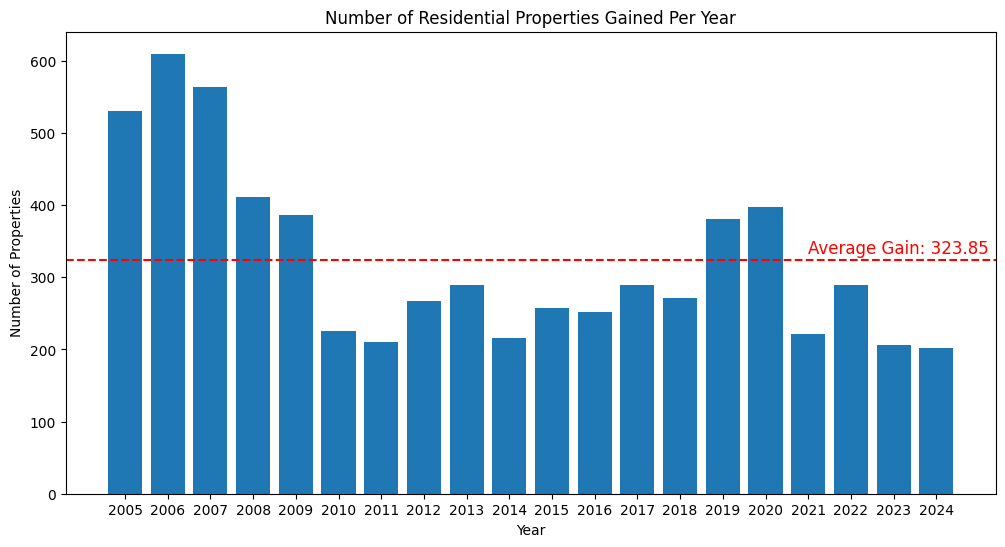

In [5]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_increase_count.index, unit_increase_count.values.flatten())

# add avg
avg = unit_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_increase_count) - 4, avg + 10, f'Average Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Number of Residential Properties Gained Per Year')
plt.show()

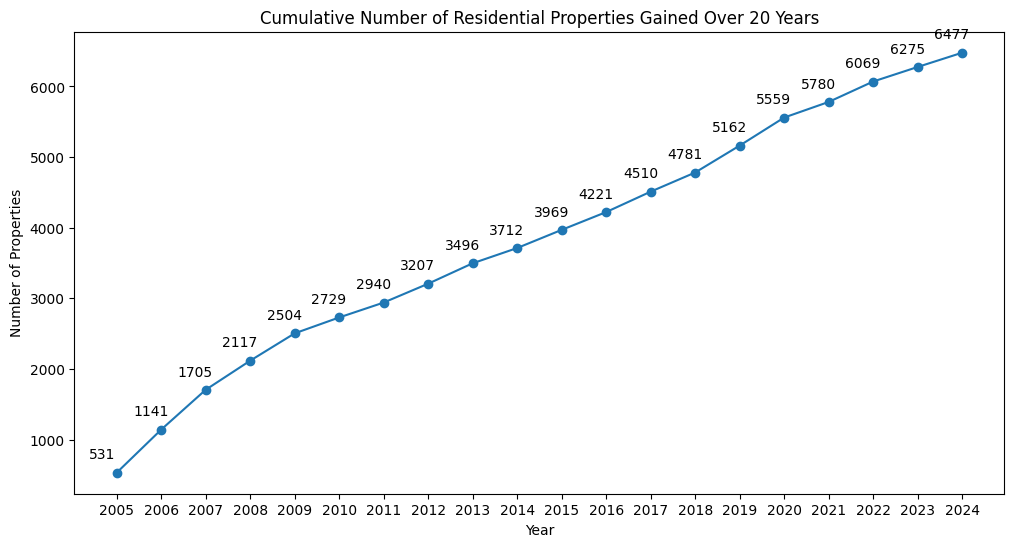

In [6]:
unit_increase_count = pd.DataFrame(unit_increase_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Cumulative Number of Residential Properties Gained Over 20 Years')
plt.show()

## Find how many residental units have been lost per year

In [7]:
# grab all multi family homes in 2004
units_04 = pa_2004[pa_2004['LU'].isin(residental_codes)]

# grab all the multi family homes in 2004 that are not in 2005
units_05 = pa_2004[~pa_2004.PID.isin(pa_2005.PID)]
units_05 = units_05[units_05['LU'].isin(residental_codes)]

# grab all the multi family homes in 2005 that are not in 2006
units_06 = pa_2005[~pa_2005.PID.isin(pa_2006.PID)]
units_06 = units_06[units_06['LU'].isin(residental_codes)]

units_07 = pa_2006[~pa_2006.PID.isin(pa_2007.PID)]
units_07 = units_07[units_07['LU'].isin(residental_codes)]

units_08 = pa_2007[~pa_2007.PID.isin(pa_2008.PID)]
units_08 = units_08[units_08['LU'].isin(residental_codes)]

units_09 = pa_2008[~pa_2008.PID.isin(pa_2009.PID)]
units_09 = units_09[units_09['LU'].isin(residental_codes)]

units_10 = pa_2009[~pa_2009.PID.isin(pa_2010.PID)]
units_10 = units_10[units_10['LU'].isin(residental_codes)]

units_11 = pa_2010[~pa_2010.PID.isin(pa_2012.PID)]
units_11 = units_11[units_11['LU'].isin(residental_codes)]

units_12 = pa_2011[~pa_2011.PID.isin(pa_2012.PID)]
units_12 = units_12[units_12['LU'].isin(residental_codes)]

units_13 = pa_2012[~pa_2012.PID.isin(pa_2013.PID)]
units_13 = units_13[units_13['LU'].isin(residental_codes)]

units_14 = pa_2013[~pa_2013.PID.isin(pa_2014.PID)]
units_14 = units_14[units_14['LU'].isin(residental_codes)]

units_15 = pa_2014[~pa_2014.PID.isin(pa_2015.PID)]
units_15 = units_15[units_15['LU'].isin(residental_codes)]

units_16 = pa_2015[~pa_2015.PID.isin(pa_2016.PID)]
units_16 = units_16[units_16['LU'].isin(residental_codes)]

units_17 = pa_2016[~pa_2016.PID.isin(pa_2017.PID)]
units_17 = units_17[units_17['LU'].isin(residental_codes)]

units_18 = pa_2017[~pa_2017.PID.isin(pa_2018.PID)]
units_18 = units_18[units_18['LU'].isin(residental_codes)]

units_19 = pa_2018[~pa_2018.PID.isin(pa_2019.PID)]
units_19 = units_19[units_19['LU'].isin(residental_codes)]

units_20 = pa_2019[~pa_2019.PID.isin(pa_2020.PID)]
units_20 = units_20[units_20['LU'].isin(residental_codes)]

units_21 = pa_2020[~pa_2020.PID.isin(pa_2021.PID)]
units_21 = units_21[units_21['LU'].isin(residental_codes)]

units_22 = pa_2021[~pa_2021.PID.isin(pa_2022.PID)]
units_22 = units_22[units_22['LU'].isin(residental_codes)]

units_23 = pa_2022[~pa_2022.PID.isin(pa_2023.PID)]
units_23 = units_23[units_23['LU'].isin(residental_codes)]

units_24 = pa_2023[~pa_2023.PID.isin(pa_2024.PID)]
units_24 = units_24[units_24['LU'].isin(residental_codes)]


# for each year, count the number of rows
unit_decrease_data = {
    '2005': [units_05['PID'].count()],
    '2006': [units_06['PID'].count()],
    '2007': [units_07['PID'].count()],
    '2008': [units_08['PID'].count()],
    '2009': [units_09['PID'].count()],
    '2010': [units_10['PID'].count()],
    '2011': [units_11['PID'].count()],
    '2012': [units_12['PID'].count()],
    '2013': [units_13['PID'].count()],
    '2014': [units_14['PID'].count()],
    '2015': [units_15['PID'].count()],
    '2016': [units_16['PID'].count()],
    '2017': [units_17['PID'].count()],
    '2018': [units_18['PID'].count()],
    '2019': [units_19['PID'].count()],
    '2020': [units_20['PID'].count()],
    '2021': [units_21['PID'].count()],
    '2022': [units_22['PID'].count()],
    '2023': [units_23['PID'].count()],
    '2024': [units_24['PID'].count()]
}

# number of units per year
print('Number of residental units lost that year')
print('05:', units_05['PID'].count())
print('06:', units_06['PID'].count())
print('07:', units_07['PID'].count())
print('08:', units_08['PID'].count())
print('09:', units_09['PID'].count())
print('10:', units_10['PID'].count())
print('11:', units_11['PID'].count())
print('12:', units_12['PID'].count())
print('13:', units_13['PID'].count())
print('14:', units_14['PID'].count())
print('15:', units_15['PID'].count())
print('16:', units_16['PID'].count())
print('17:', units_17['PID'].count())
print('18:', units_18['PID'].count())
print('19:', units_19['PID'].count())
print('20:', units_20['PID'].count())
print('21:', units_21['PID'].count())
print('22:', units_22['PID'].count())
print('23:', units_23['PID'].count())
print('24:', units_24['PID'].count())


Number of residental units lost that year
05: 170
06: 203
07: 192
08: 172
09: 153
10: 95
11: 90
12: 53
13: 46
14: 31
15: 84
16: 42
17: 66
18: 129
19: 37
20: 50
21: 47
22: 41
23: 61
24: 41


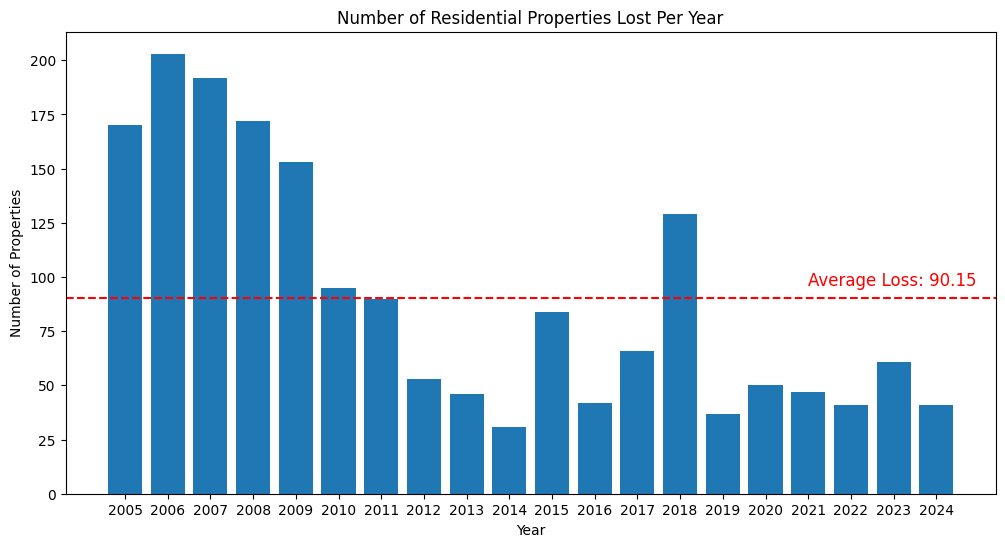

In [8]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

plt.figure(figsize=(12, 6))
plt.bar(unit_decrease_count.index, unit_decrease_count.values.flatten())

# add avg
avg = unit_decrease_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_decrease_count) - 4, avg + 6, f'Average Loss: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Number of Residential Properties Lost Per Year')
plt.show()

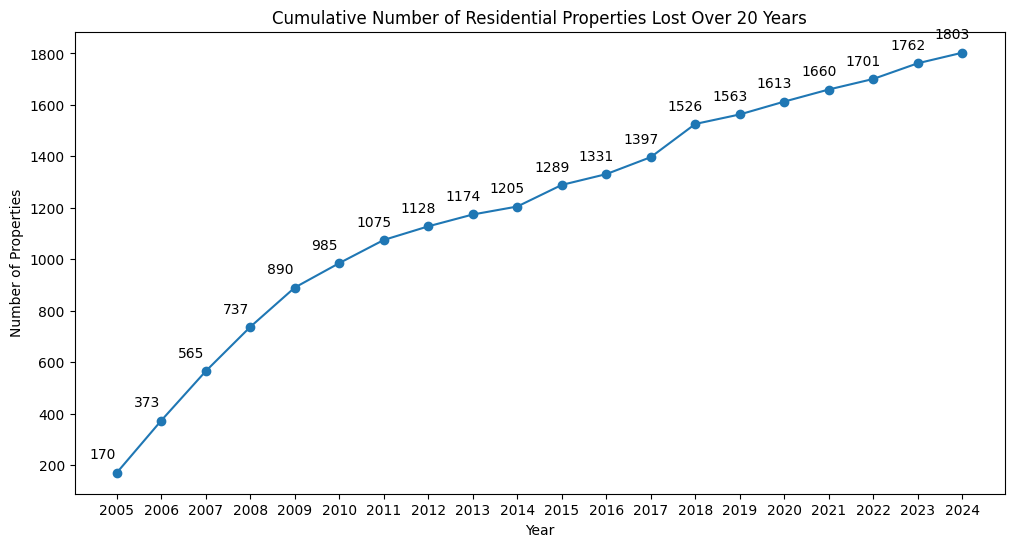

In [9]:
unit_decrease_count = pd.DataFrame(unit_decrease_data).transpose()

# Calculate the cumulative sum
cumulative_units = unit_decrease_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_units.index, cumulative_units.values.flatten(), marker='o', linestyle='-')

for x, y in zip(cumulative_units.index,cumulative_units.values.flatten()):
    plt.annotate(f'{y}', xy=(x, y), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Properties')
plt.title('Cumulative Number of Residential Properties Lost Over 20 Years')
plt.show()

## Combine findings of how many residental units have been added and lost to find if there has been a net gain or a net loss

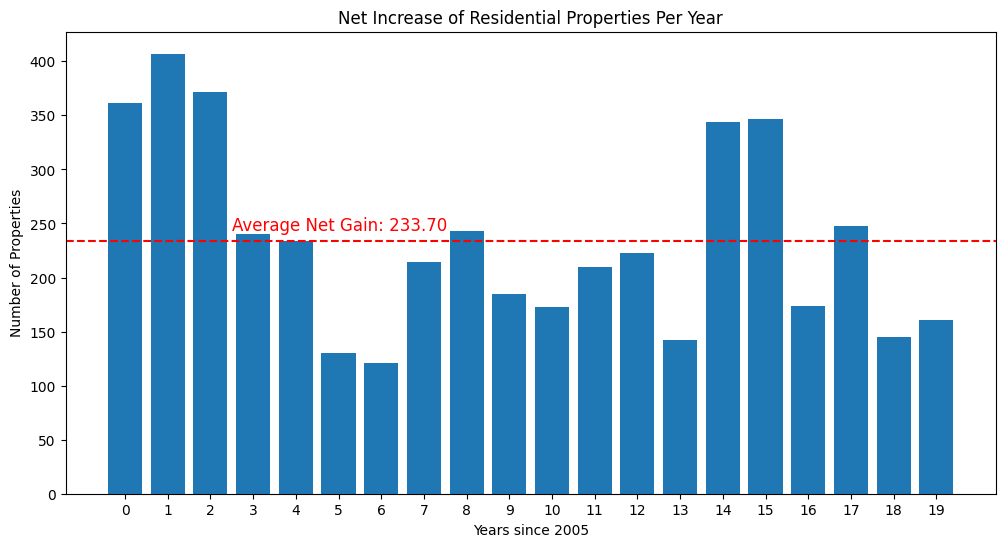

In [10]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

plt.figure(figsize=(12, 6))
plt.bar(unit_net_increase_count.index, unit_net_increase_count.values.flatten())

# add avg
avg = unit_net_increase_count.mean()[0]
plt.axhline(y=avg, color='r', linestyle='--', label='Average')
plt.text(len(unit_net_increase_count) - 17.5, avg + 10, f'Average Net Gain: {avg:.2f}', color='r', fontsize=12)

# Adding labels and title
plt.xlabel('Years since 2005')
plt.xticks(unit_net_increase_count.index)
plt.ylabel('Number of Properties')
plt.title('Net Increase of Residential Properties Per Year')
plt.show()

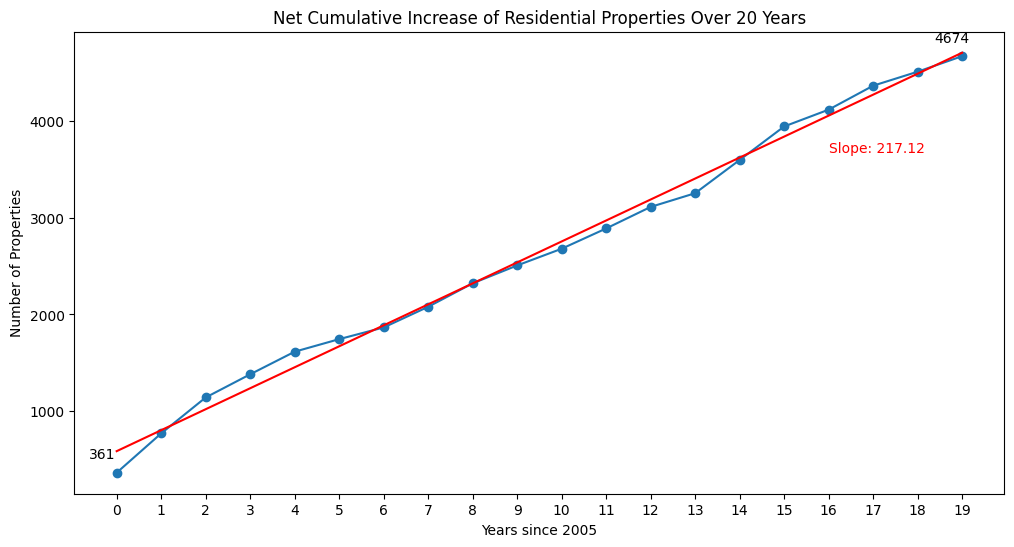

In [11]:
unit_net_increase_count = pd.DataFrame(unit_increase_count.values - unit_decrease_count.values)

net_cumulative_units = unit_net_increase_count.cumsum()

plt.figure(figsize=(12, 6))
plt.plot(net_cumulative_units.index, net_cumulative_units.values.flatten(), marker='o', linestyle='-')

slope, intercept, r_value, p_value, std_err = linregress(net_cumulative_units.index, net_cumulative_units.values.flatten())
# Plot best fit line
plt.plot(net_cumulative_units.index, slope*net_cumulative_units.index + intercept, color='red', label=f'Best Fit Line (Slope: {slope:.2f})')
# Print slope on the graph
plt.text(16, max(net_cumulative_units.values.flatten()) - 1000, f'Slope: {slope:.2f}', fontsize=10, color='red')

plt.annotate(f'{net_cumulative_units.values.flatten()[0]}', xy=(net_cumulative_units.index[0], net_cumulative_units.values.flatten()[0]), xytext=(-20, 10), textcoords='offset points')
plt.annotate(f'{net_cumulative_units.values.flatten()[-1]}', xy=(net_cumulative_units.index[-1], net_cumulative_units.values.flatten()[-1]), xytext=(-20, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel('Years since 2005')
plt.xticks(unit_net_increase_count.index)
plt.ylabel('Number of Properties')
plt.title('Net Cumulative Increase of Residential Properties Over 20 Years')
plt.show()

## Use the year remodeled column and check land usage before and after remodel if available

In [12]:
remodel_2008 = pd.read_csv('../data/property_assessment_2008.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2009 = pd.read_csv('../data/property_assessment_2009.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2010 = pd.read_csv('../data/property_assessment_2010.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2011 = pd.read_csv('../data/property_assessment_2011.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2012 = pd.read_csv('../data/property_assessment_2012.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2013 = pd.read_csv('../data/property_assessment_2013.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2014 = pd.read_csv('../data/property_assessment_2014.csv', low_memory=False)[['Parcel_ID', 'YR_REMOD']]
remodel_2015 = pd.read_csv('../data/property_assessment_2015.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2016 = pd.read_csv('../data/property_assessment_2016.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2017 = pd.read_csv('../data/property_assessment_2017.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2018 = pd.read_csv('../data/property_assessment_2018.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2019 = pd.read_csv('../data/property_assessment_2019.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2020 = pd.read_csv('../data/property_assessment_2020.csv', low_memory=False)[['PID', 'YR_REMOD']]
remodel_2021 = pd.read_csv('../data/property_assessment_2021.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2022 = pd.read_csv('../data/property_assessment_2022.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2023 = pd.read_csv('../data/property_assessment_2023.csv', low_memory=False)[['PID', 'YR_REMODEL']]
remodel_2024 = pd.read_csv('../data/property_assessment_2024.csv', low_memory=False)[['PID', 'YR_REMODEL']]

In [13]:
# preprocess remodel data
# fix 2014 PID column name to match all others
remodel_2014.rename(columns={'Parcel_ID': 'PID'}, inplace=True)

# change year remodel column names for 21, 22, 23, and 24 to match other years
remodel_2021.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2022.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2023.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)
remodel_2024.rename(columns={'YR_REMODEL': 'YR_REMOD'}, inplace=True)

# remove underscore from PID in years 2014, 2015, 2016, and 2017 and convert to type int64
remodel_2014['PID'] = remodel_2014['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2015['PID'] = remodel_2015['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2016['PID'] = remodel_2016['PID'].astype(str).str.replace('_', '').astype(int)
remodel_2017['PID'] = remodel_2017['PID'].astype(str).str.replace('_', '').astype(int)


In [14]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 155564
09: 158092
10: 160083
11: 161261
12: 164847
13: 165608
14: 164091
15: 168115
16: 169199
17: 170910
18: 172841
19: 174668
20: 175052
21: 177091
22: 178598
23: 180627
24: 182242


In [15]:
#drop null rows
remodel_2008 = remodel_2008.dropna()
remodel_2009 = remodel_2009.dropna()
remodel_2010 = remodel_2010.dropna()
remodel_2011 = remodel_2011.dropna()
remodel_2012 = remodel_2012.dropna()
remodel_2013 = remodel_2013.dropna()
remodel_2014 = remodel_2014.dropna()
remodel_2015 = remodel_2015.dropna()
remodel_2016 = remodel_2016.dropna()
remodel_2017 = remodel_2017.dropna()
remodel_2018 = remodel_2018.dropna()
remodel_2019 = remodel_2019.dropna()
remodel_2020 = remodel_2020.dropna()
remodel_2021 = remodel_2021.dropna()
remodel_2022 = remodel_2022.dropna()
remodel_2023 = remodel_2023.dropna()
remodel_2024 = remodel_2024.dropna()

In [16]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 125668
09: 126630
10: 127669
11: 128015
12: 129481
13: 129736
14: 164091
15: 130772
16: 131135
17: 131370
18: 131561
19: 132872
20: 88795
21: 84939
22: 92092
23: 85400
24: 86718


In [17]:
# drop rows that have a remodel year outside of what we can check LU codes for
remodel_2008 = remodel_2008[(remodel_2008['YR_REMOD'] >= 2005) & (remodel_2008['YR_REMOD'] <= 2023)] 
remodel_2009 = remodel_2009[(remodel_2009['YR_REMOD'] >= 2005) & (remodel_2009['YR_REMOD'] <= 2023)] 
remodel_2010 = remodel_2010[(remodel_2010['YR_REMOD'] >= 2005) & (remodel_2010['YR_REMOD'] <= 2023)] 
remodel_2011 = remodel_2011[(remodel_2011['YR_REMOD'] >= 2005) & (remodel_2011['YR_REMOD'] <= 2023)] 
remodel_2012 = remodel_2012[(remodel_2012['YR_REMOD'] >= 2005) & (remodel_2012['YR_REMOD'] <= 2023)] 
remodel_2013 = remodel_2013[(remodel_2013['YR_REMOD'] >= 2005) & (remodel_2013['YR_REMOD'] <= 2023)] 
remodel_2014 = remodel_2014[(remodel_2014['YR_REMOD'] >= 2005) & (remodel_2014['YR_REMOD'] <= 2023)] 
remodel_2015 = remodel_2015[(remodel_2015['YR_REMOD'] >= 2005) & (remodel_2015['YR_REMOD'] <= 2023)] 
remodel_2016 = remodel_2016[(remodel_2016['YR_REMOD'] >= 2005) & (remodel_2016['YR_REMOD'] <= 2023)] 
remodel_2017 = remodel_2017[(remodel_2017['YR_REMOD'] >= 2005) & (remodel_2017['YR_REMOD'] <= 2023)] 
remodel_2018 = remodel_2018[(remodel_2018['YR_REMOD'] >= 2005) & (remodel_2018['YR_REMOD'] <= 2023)] 
remodel_2019 = remodel_2019[(remodel_2019['YR_REMOD'] >= 2005) & (remodel_2019['YR_REMOD'] <= 2023)] 
remodel_2020 = remodel_2020[(remodel_2020['YR_REMOD'] >= 2005) & (remodel_2020['YR_REMOD'] <= 2023)] 
remodel_2021 = remodel_2021[(remodel_2021['YR_REMOD'] >= 2005) & (remodel_2021['YR_REMOD'] <= 2023)] 
remodel_2022 = remodel_2022[(remodel_2022['YR_REMOD'] >= 2005) & (remodel_2022['YR_REMOD'] <= 2023)] 
remodel_2023 = remodel_2023[(remodel_2023['YR_REMOD'] >= 2005) & (remodel_2023['YR_REMOD'] <= 2023)] 
remodel_2024 = remodel_2024[(remodel_2024['YR_REMOD'] >= 2005) & (remodel_2024['YR_REMOD'] <= 2023)] 

In [18]:
print('08:', remodel_2008['PID'].count())
print('09:', remodel_2009['PID'].count())
print('10:', remodel_2010['PID'].count())
print('11:', remodel_2011['PID'].count())
print('12:', remodel_2012['PID'].count())
print('13:', remodel_2013['PID'].count())
print('14:', remodel_2014['PID'].count())
print('15:', remodel_2015['PID'].count())
print('16:', remodel_2016['PID'].count())
print('17:', remodel_2017['PID'].count())
print('18:', remodel_2018['PID'].count())
print('19:', remodel_2019['PID'].count())
print('20:', remodel_2020['PID'].count())
print('21:', remodel_2021['PID'].count())
print('22:', remodel_2022['PID'].count())
print('23:', remodel_2023['PID'].count())
print('24:', remodel_2024['PID'].count())

08: 6847
09: 8860
10: 11647
11: 13727
12: 15646
13: 17707
14: 19830
15: 22154
16: 24380
17: 27456
18: 30369
19: 34276
20: 37069
21: 38342
22: 42687
23: 41750
24: 43998


In [19]:
# combine all available data into one data frame
remodel_df = pd.concat([remodel_2008, remodel_2009, remodel_2010, remodel_2011, remodel_2012, remodel_2013, remodel_2014, remodel_2015, remodel_2016, remodel_2017, remodel_2018, remodel_2019, remodel_2020, remodel_2021, remodel_2022, remodel_2023, remodel_2024])

print(remodel_df['PID'].count())

436745


In [20]:
# drop any duplicate rows
remodel_df = remodel_df.drop_duplicates(subset=['PID', 'YR_REMOD'], keep='first')
remodel_df = remodel_df.reset_index(drop=True)

# convert from float to int
remodel_df['YR_REMOD'] = remodel_df['YR_REMOD'].astype(int)

print(remodel_df['PID'].count())

58440


In [21]:
remodel_df.head(25)

,PID,YR_REMOD
0,100153000,2005
1,100153002,2005
2,100153004,2005
3,100153006,2005
4,100153008,2005
5,100177000,2005
6,100195010,2005
7,100210000,2006
8,100251000,2006
9,100464000,2005


In [22]:
remodel_2005 = remodel_df[remodel_df['YR_REMOD'] == 2005]
remodel_2006 = remodel_df[remodel_df['YR_REMOD'] == 2006]
remodel_2007 = remodel_df[remodel_df['YR_REMOD'] == 2007]
remodel_2008 = remodel_df[remodel_df['YR_REMOD'] == 2008]
remodel_2009 = remodel_df[remodel_df['YR_REMOD'] == 2009]
remodel_2010 = remodel_df[remodel_df['YR_REMOD'] == 2010]
remodel_2011 = remodel_df[remodel_df['YR_REMOD'] == 2011]
remodel_2012 = remodel_df[remodel_df['YR_REMOD'] == 2012]
remodel_2013 = remodel_df[remodel_df['YR_REMOD'] == 2013]
remodel_2014 = remodel_df[remodel_df['YR_REMOD'] == 2014]
remodel_2015 = remodel_df[remodel_df['YR_REMOD'] == 2015]
remodel_2016 = remodel_df[remodel_df['YR_REMOD'] == 2016]
remodel_2017 = remodel_df[remodel_df['YR_REMOD'] == 2017]
remodel_2018 = remodel_df[remodel_df['YR_REMOD'] == 2018]
remodel_2019 = remodel_df[remodel_df['YR_REMOD'] == 2019]
remodel_2020 = remodel_df[remodel_df['YR_REMOD'] == 2020]
remodel_2021 = remodel_df[remodel_df['YR_REMOD'] == 2021]
remodel_2022 = remodel_df[remodel_df['YR_REMOD'] == 2022]
remodel_2023 = remodel_df[remodel_df['YR_REMOD'] == 2023]

In [23]:
# grab the land usage values for all properties that have reno year values for each
lu_04 = (pa_2004[pa_2004.PID.isin(remodel_df.PID)]).copy()
lu_04.rename(columns={'LU': '2004_LU'}, inplace=True)

lu_05 = (pa_2005[pa_2005.PID.isin(remodel_df.PID)]).copy()
lu_05.rename(columns={'LU': '2005_LU'}, inplace=True)

lu_06 = (pa_2006[pa_2006.PID.isin(remodel_df.PID)]).copy()
lu_06.rename(columns={'LU': '2006_LU'}, inplace=True)

lu_07 = (pa_2007[pa_2007.PID.isin(remodel_df.PID)]).copy()
lu_07.rename(columns={'LU': '2007_LU'}, inplace=True)

lu_08 = (pa_2008[pa_2008.PID.isin(remodel_df.PID)]).copy()
lu_08.rename(columns={'LU': '2008_LU'}, inplace=True)

lu_09 = (pa_2009[pa_2009.PID.isin(remodel_df.PID)]).copy()
lu_09.rename(columns={'LU': '2009_LU'}, inplace=True)

lu_10 = (pa_2010[pa_2010.PID.isin(remodel_df.PID)]).copy()
lu_10.rename(columns={'LU': '2010_LU'}, inplace=True)

lu_11 = (pa_2011[pa_2011.PID.isin(remodel_df.PID)]).copy()
lu_11.rename(columns={'LU': '2011_LU'}, inplace=True)

lu_12 = (pa_2012[pa_2012.PID.isin(remodel_df.PID)]).copy()
lu_12.rename(columns={'LU': '2012_LU'}, inplace=True)

lu_13 = (pa_2013[pa_2013.PID.isin(remodel_df.PID)]).copy()
lu_13.rename(columns={'LU': '2013_LU'}, inplace=True)

lu_14 = (pa_2014[pa_2014.PID.isin(remodel_df.PID)]).copy()
lu_14.rename(columns={'LU': '2014_LU'}, inplace=True)

lu_15 = (pa_2015[pa_2015.PID.isin(remodel_df.PID)]).copy()
lu_15.rename(columns={'LU': '2015_LU'}, inplace=True)

lu_16 = (pa_2016[pa_2016.PID.isin(remodel_df.PID)]).copy()
lu_16.rename(columns={'LU': '2016_LU'}, inplace=True)

lu_17 = (pa_2017[pa_2017.PID.isin(remodel_df.PID)]).copy()
lu_17.rename(columns={'LU': '2017_LU'}, inplace=True)

lu_18 = (pa_2018[pa_2018.PID.isin(remodel_df.PID)]).copy()
lu_18.rename(columns={'LU': '2018_LU'}, inplace=True)

lu_19 = (pa_2019[pa_2019.PID.isin(remodel_df.PID)]).copy()
lu_19.rename(columns={'LU': '2019_LU'}, inplace=True)

lu_20 = (pa_2020[pa_2020.PID.isin(remodel_df.PID)]).copy()
lu_20.rename(columns={'LU': '2020_LU'}, inplace=True)

lu_21 = (pa_2021[pa_2021.PID.isin(remodel_df.PID)]).copy()
lu_21.rename(columns={'LU': '2021_LU'}, inplace=True)

lu_22 = (pa_2022[pa_2022.PID.isin(remodel_df.PID)]).copy()
lu_22.rename(columns={'LU': '2022_LU'}, inplace=True)

lu_23 = (pa_2023[pa_2023.PID.isin(remodel_df.PID)]).copy()
lu_23.rename(columns={'LU': '2023_LU'}, inplace=True)

lu_24 = (pa_2024[pa_2024.PID.isin(remodel_df.PID)]).copy()
lu_24.rename(columns={'LU': '2024_LU'}, inplace=True)


In [24]:
remodel_2005 = pd.merge(remodel_2005, lu_04, on='PID').merge(lu_06, on='PID')
remodel_2006 = pd.merge(remodel_2006, lu_05, on='PID').merge(lu_07, on='PID')
remodel_2007 = pd.merge(remodel_2007, lu_06, on='PID').merge(lu_08, on='PID')
remodel_2008 = pd.merge(remodel_2008, lu_07, on='PID').merge(lu_09, on='PID')
remodel_2009 = pd.merge(remodel_2009, lu_08, on='PID').merge(lu_10, on='PID')
remodel_2010 = pd.merge(remodel_2010, lu_09, on='PID').merge(lu_11, on='PID')
remodel_2011 = pd.merge(remodel_2011, lu_10, on='PID').merge(lu_12, on='PID')
remodel_2012 = pd.merge(remodel_2012, lu_11, on='PID').merge(lu_13, on='PID')
remodel_2013 = pd.merge(remodel_2013, lu_12, on='PID').merge(lu_14, on='PID')
remodel_2014 = pd.merge(remodel_2014, lu_13, on='PID').merge(lu_15, on='PID')
remodel_2015 = pd.merge(remodel_2015, lu_14, on='PID').merge(lu_16, on='PID')
remodel_2016 = pd.merge(remodel_2016, lu_15, on='PID').merge(lu_17, on='PID')
remodel_2017 = pd.merge(remodel_2017, lu_16, on='PID').merge(lu_18, on='PID')
remodel_2018 = pd.merge(remodel_2018, lu_17, on='PID').merge(lu_19, on='PID')
remodel_2019 = pd.merge(remodel_2019, lu_18, on='PID').merge(lu_20, on='PID')
remodel_2020 = pd.merge(remodel_2020, lu_19, on='PID').merge(lu_21, on='PID')
remodel_2021 = pd.merge(remodel_2021, lu_20, on='PID').merge(lu_22, on='PID')
remodel_2022 = pd.merge(remodel_2022, lu_21, on='PID').merge(lu_23, on='PID')
remodel_2023 = pd.merge(remodel_2023, lu_22, on='PID').merge(lu_24, on='PID')

In [25]:
changed_05 = remodel_2005[remodel_2005['2004_LU'] != remodel_2005['2006_LU']]
changed_06 = remodel_2006[remodel_2006['2005_LU'] != remodel_2006['2007_LU']]
changed_07 = remodel_2007[remodel_2007['2006_LU'] != remodel_2007['2008_LU']]
changed_08 = remodel_2008[remodel_2008['2007_LU'] != remodel_2008['2009_LU']]
changed_09 = remodel_2009[remodel_2009['2008_LU'] != remodel_2009['2010_LU']]
changed_10 = remodel_2010[remodel_2010['2009_LU'] != remodel_2010['2011_LU']]
changed_11 = remodel_2011[remodel_2011['2010_LU'] != remodel_2011['2012_LU']]
changed_12 = remodel_2012[remodel_2012['2011_LU'] != remodel_2012['2013_LU']]
changed_13 = remodel_2013[remodel_2013['2012_LU'] != remodel_2013['2014_LU']]
changed_14 = remodel_2014[remodel_2014['2013_LU'] != remodel_2014['2015_LU']]
changed_15 = remodel_2015[remodel_2015['2014_LU'] != remodel_2015['2016_LU']]
changed_16 = remodel_2016[remodel_2016['2015_LU'] != remodel_2016['2017_LU']]
changed_17 = remodel_2017[remodel_2017['2016_LU'] != remodel_2017['2018_LU']]
changed_18 = remodel_2018[remodel_2018['2017_LU'] != remodel_2018['2019_LU']]
changed_19 = remodel_2019[remodel_2019['2018_LU'] != remodel_2019['2020_LU']]
changed_20 = remodel_2020[remodel_2020['2019_LU'] != remodel_2020['2021_LU']]
changed_21 = remodel_2021[remodel_2021['2020_LU'] != remodel_2021['2022_LU']]
changed_22 = remodel_2022[remodel_2022['2021_LU'] != remodel_2022['2023_LU']]
changed_23 = remodel_2023[remodel_2023['2022_LU'] != remodel_2023['2024_LU']]

In [26]:
total_remodels = remodel_2005.size + remodel_2006.size + remodel_2007.size + remodel_2008.size + remodel_2009.size + remodel_2010.size + remodel_2011.size + remodel_2012.size + remodel_2013.size + remodel_2014.size + remodel_2015.size + remodel_2016.size + remodel_2017.size + remodel_2018.size + remodel_2019.size + remodel_2020.size + remodel_2021.size + remodel_2022.size + remodel_2023.size

total_remodels

199868

In [27]:
total_changed = changed_05.size + changed_06.size + changed_07.size + changed_08.size + changed_09.size + changed_10.size + changed_11.size + changed_12.size + changed_13.size + changed_14.size + changed_15.size + changed_16.size + changed_17.size + changed_18.size + changed_19.size + changed_20.size + changed_21.size + changed_22.size + changed_23.size

total_changed

4632

In [28]:
# find number of lost residental properties
lost = (changed_05[(changed_05['2004_LU'].isin(residental_codes)) & ~(changed_05['2006_LU'].isin(residental_codes))]).size
lost += (changed_06[(changed_06['2005_LU'].isin(residental_codes)) & ~(changed_06['2007_LU'].isin(residental_codes))]).size
lost += (changed_07[(changed_07['2006_LU'].isin(residental_codes)) & ~(changed_07['2008_LU'].isin(residental_codes))]).size
lost += (changed_08[(changed_08['2007_LU'].isin(residental_codes)) & ~(changed_08['2009_LU'].isin(residental_codes))]).size
lost += (changed_09[(changed_09['2008_LU'].isin(residental_codes)) & ~(changed_09['2010_LU'].isin(residental_codes))]).size
lost += (changed_10[(changed_10['2009_LU'].isin(residental_codes)) & ~(changed_10['2011_LU'].isin(residental_codes))]).size
lost += (changed_11[(changed_11['2010_LU'].isin(residental_codes)) & ~(changed_11['2012_LU'].isin(residental_codes))]).size
lost += (changed_12[(changed_12['2011_LU'].isin(residental_codes)) & ~(changed_12['2013_LU'].isin(residental_codes))]).size
lost += (changed_13[(changed_13['2012_LU'].isin(residental_codes)) & ~(changed_13['2014_LU'].isin(residental_codes))]).size
lost += (changed_14[(changed_14['2013_LU'].isin(residental_codes)) & ~(changed_14['2015_LU'].isin(residental_codes))]).size
lost += (changed_15[(changed_15['2014_LU'].isin(residental_codes)) & ~(changed_15['2016_LU'].isin(residental_codes))]).size
lost += (changed_16[(changed_16['2015_LU'].isin(residental_codes)) & ~(changed_16['2017_LU'].isin(residental_codes))]).size
lost += (changed_17[(changed_17['2016_LU'].isin(residental_codes)) & ~(changed_17['2018_LU'].isin(residental_codes))]).size
lost += (changed_18[(changed_18['2017_LU'].isin(residental_codes)) & ~(changed_18['2019_LU'].isin(residental_codes))]).size
lost += (changed_19[(changed_19['2018_LU'].isin(residental_codes)) & ~(changed_19['2020_LU'].isin(residental_codes))]).size
lost += (changed_20[(changed_20['2019_LU'].isin(residental_codes)) & ~(changed_20['2021_LU'].isin(residental_codes))]).size
lost += (changed_21[(changed_21['2020_LU'].isin(residental_codes)) & ~(changed_21['2022_LU'].isin(residental_codes))]).size
lost += (changed_22[(changed_22['2021_LU'].isin(residental_codes)) & ~(changed_22['2023_LU'].isin(residental_codes))]).size
lost += (changed_23[(changed_23['2022_LU'].isin(residental_codes)) & ~(changed_23['2024_LU'].isin(residental_codes))]).size

lost

252

In [29]:
# find number of gained residental properties

gained = (changed_05[~(changed_05['2004_LU'].isin(residental_codes)) & (changed_05['2006_LU'].isin(residental_codes))]).size
gained += (changed_06[~(changed_06['2005_LU'].isin(residental_codes)) & (changed_06['2007_LU'].isin(residental_codes))]).size
gained += (changed_07[~(changed_07['2006_LU'].isin(residental_codes)) & (changed_07['2008_LU'].isin(residental_codes))]).size
gained += (changed_08[~(changed_08['2007_LU'].isin(residental_codes)) & (changed_08['2009_LU'].isin(residental_codes))]).size
gained += (changed_09[~(changed_09['2008_LU'].isin(residental_codes)) & (changed_09['2010_LU'].isin(residental_codes))]).size
gained += (changed_10[~(changed_10['2009_LU'].isin(residental_codes)) & (changed_10['2011_LU'].isin(residental_codes))]).size
gained += (changed_11[~(changed_11['2010_LU'].isin(residental_codes)) & (changed_11['2012_LU'].isin(residental_codes))]).size
gained += (changed_12[~(changed_12['2011_LU'].isin(residental_codes)) & (changed_12['2013_LU'].isin(residental_codes))]).size
gained += (changed_13[~(changed_13['2012_LU'].isin(residental_codes)) & (changed_13['2014_LU'].isin(residental_codes))]).size
gained += (changed_14[~(changed_14['2013_LU'].isin(residental_codes)) & (changed_14['2015_LU'].isin(residental_codes))]).size
gained += (changed_15[~(changed_15['2014_LU'].isin(residental_codes)) & (changed_15['2016_LU'].isin(residental_codes))]).size
gained += (changed_16[~(changed_16['2015_LU'].isin(residental_codes)) & (changed_16['2017_LU'].isin(residental_codes))]).size
gained += (changed_17[~(changed_17['2016_LU'].isin(residental_codes)) & (changed_17['2018_LU'].isin(residental_codes))]).size
gained += (changed_18[~(changed_18['2017_LU'].isin(residental_codes)) & (changed_18['2019_LU'].isin(residental_codes))]).size
gained += (changed_19[~(changed_19['2018_LU'].isin(residental_codes)) & (changed_19['2020_LU'].isin(residental_codes))]).size
gained += (changed_20[~(changed_20['2019_LU'].isin(residental_codes)) & (changed_20['2021_LU'].isin(residental_codes))]).size
gained += (changed_21[~(changed_21['2020_LU'].isin(residental_codes)) & (changed_21['2022_LU'].isin(residental_codes))]).size
gained += (changed_22[~(changed_22['2021_LU'].isin(residental_codes)) & (changed_22['2023_LU'].isin(residental_codes))]).size
gained += (changed_23[~(changed_23['2022_LU'].isin(residental_codes)) & (changed_23['2024_LU'].isin(residental_codes))]).size

gained

1068

In [30]:
# find number of properties that were residental and stayed residental
stayed = (changed_05[(changed_05['2004_LU'].isin(residental_codes)) & (changed_05['2006_LU'].isin(residental_codes))]).size
stayed += (changed_06[(changed_06['2005_LU'].isin(residental_codes)) & (changed_06['2007_LU'].isin(residental_codes))]).size
stayed += (changed_07[(changed_07['2006_LU'].isin(residental_codes)) & (changed_07['2008_LU'].isin(residental_codes))]).size
stayed += (changed_08[(changed_08['2007_LU'].isin(residental_codes)) & (changed_08['2009_LU'].isin(residental_codes))]).size
stayed += (changed_09[(changed_09['2008_LU'].isin(residental_codes)) & (changed_09['2010_LU'].isin(residental_codes))]).size
stayed += (changed_10[(changed_10['2009_LU'].isin(residental_codes)) & (changed_10['2011_LU'].isin(residental_codes))]).size
stayed += (changed_11[(changed_11['2010_LU'].isin(residental_codes)) & (changed_11['2012_LU'].isin(residental_codes))]).size
stayed += (changed_12[(changed_12['2011_LU'].isin(residental_codes)) & (changed_12['2013_LU'].isin(residental_codes))]).size
stayed += (changed_13[(changed_13['2012_LU'].isin(residental_codes)) & (changed_13['2014_LU'].isin(residental_codes))]).size
stayed += (changed_14[(changed_14['2013_LU'].isin(residental_codes)) & (changed_14['2015_LU'].isin(residental_codes))]).size
stayed += (changed_15[(changed_15['2014_LU'].isin(residental_codes)) & (changed_15['2016_LU'].isin(residental_codes))]).size
stayed += (changed_16[(changed_16['2015_LU'].isin(residental_codes)) & (changed_16['2017_LU'].isin(residental_codes))]).size
stayed += (changed_17[(changed_17['2016_LU'].isin(residental_codes)) & (changed_17['2018_LU'].isin(residental_codes))]).size
stayed += (changed_18[(changed_18['2017_LU'].isin(residental_codes)) & (changed_18['2019_LU'].isin(residental_codes))]).size
stayed += (changed_19[(changed_19['2018_LU'].isin(residental_codes)) & (changed_19['2020_LU'].isin(residental_codes))]).size
stayed += (changed_20[(changed_20['2019_LU'].isin(residental_codes)) & (changed_20['2021_LU'].isin(residental_codes))]).size
stayed += (changed_21[(changed_21['2020_LU'].isin(residental_codes)) & (changed_21['2022_LU'].isin(residental_codes))]).size
stayed += (changed_22[(changed_22['2021_LU'].isin(residental_codes)) & (changed_22['2023_LU'].isin(residental_codes))]).size
stayed += (changed_23[(changed_23['2022_LU'].isin(residental_codes)) & (changed_23['2024_LU'].isin(residental_codes))]).size

stayed

2660

In [31]:
remodels_related_to_residental = lost + gained + stayed

remodels_related_to_residental

3980